<a href="https://colab.research.google.com/github/jainaryan/eda-class/blob/main/EDA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from plotnine import *



In [2]:
# Read the dataset
data = pd.read_csv("//content//KosteckiDillon.csv")

# Check if any NA exists
na_exists = data.isnull().values.any()
print(f"Any missing values? {na_exists}")

# Find the total number of NA in the dataset
total_na = data.isnull().sum().sum()
print(f"Total number of missing values: {total_na}")

# Display the missing values per column for each observation
na_per_column = data.isnull().sum()
print("Missing values per column:")
print(na_per_column)

# Perform row-wise deletion
data_cleaned = data.dropna()

# Display the number of rows and columns in the dataset
print(f"Rows: {data_cleaned.shape[0]}, Columns: {data_cleaned.shape[1]}")


Any missing values? False
Total number of missing values: 0
Missing values per column:
rownames      0
id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64
Rows: 4152, Columns: 10


In [3]:
# Data deduplication
data_deduplicated = data.drop_duplicates()
print(data_deduplicated)

      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]


In [4]:

# Display the header or attribute names from the dataset
print("Attribute names:")
print(list(data.columns))
print("")
# Display the structure of the dataset
print("Dataset structure:")
print(data.info())
print("")
# View the first and last 3 rows of the dataset
print("First 3 rows:")
print(data.head(3))
print("Last 3 rows:")
print(data.tail(3))

Attribute names:
['rownames', 'id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache', 'sex']

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4152 non-null   int64  
 1   id          4152 non-null   int64  
 2   time        4152 non-null   int64  
 3   dos         4152 non-null   int64  
 4   hatype      4152 non-null   object 
 5   age         4152 non-null   int64  
 6   airq        4152 non-null   float64
 7   medication  4152 non-null   object 
 8   headache    4152 non-null   object 
 9   sex         4152 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 324.5+ KB
None

First 3 rows:
   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30  

In [5]:
# Reshaping with hierarchical indexing
# Assume 'id' and 'sex' are to be used as hierarchical index
data_hierarchical = data.set_index(['id', 'sex'])
print(data_hierarchical)


            rownames  time   dos hatype  age  airq  medication headache
id  sex                                                                
1   female         1   -11   753   Aura   30   9.0  continuing      yes
    female         2   -10   754   Aura   30   7.0  continuing      yes
    female         3    -9   755   Aura   30  10.0  continuing      yes
    female         4    -8   756   Aura   30  13.0  continuing      yes
    female         5    -7   757   Aura   30  18.0  continuing      yes
...              ...   ...   ...    ...  ...   ...         ...      ...
133 male        4148    44  1232   Aura   26  20.0  continuing      yes
    male        4149    45  1233   Aura   26  27.0  continuing       no
    male        4150    46  1234   Aura   26  28.0  continuing       no
    male        4151    47  1235   Aura   26  33.0  continuing       no
    male        4152    48  1236   Aura   26  25.0  continuing      yes

[4152 rows x 8 columns]


In [6]:

# Replacing 'yes' with 1 and 'no' with 0 in the 'headache' column
data['headache'] = data['headache'].replace({'yes': 1, 'no': 0})
print(data)


      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25.0  continuing         1   

         sex  
0     female  
1     female  
2     female  
3     female  
4     female  
...      

In [7]:
# Filling missing values with the mean of the column 'age'
data_filled_na = data.fillna(data['age'].mean())
print(data_filled_na)


      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25.0  continuing         1   

         sex  
0     female  
1     female  
2     female  
3     female  
4     female  
...      

In [8]:
# Discretization and binning of 'age' column
bins = [0, 20, 30, 40, 50, 60]  # Define the bin ranges
labels = ['0-20', '20-30', '30-40', '40-50', '50-60']  # Define bin labels

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
print(data[['age', 'age_group']])


      age age_group
0      30     20-30
1      30     20-30
2      30     20-30
3      30     20-30
4      30     20-30
...   ...       ...
4147   26     20-30
4148   26     20-30
4149   26     20-30
4150   26     20-30
4151   26     20-30

[4152 rows x 2 columns]


In [9]:
# Outlier detection and filtering
# Using the IQR (Interquartile Range) method for 'age' column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall outside 1.5*IQR range
outliers = data[(data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

# Removing outliers from the dataset
data_no_outliers = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]
print(data_no_outliers)


Outliers:
Empty DataFrame
Columns: [rownames, id, time, dos, hatype, age, airq, medication, headache, sex, age_group]
Index: []
      rownames   id  time   dos hatype  age  airq  medication  headache  \
0            1    1   -11   753   Aura   30   9.0  continuing         1   
1            2    1   -10   754   Aura   30   7.0  continuing         1   
2            3    1    -9   755   Aura   30  10.0  continuing         1   
3            4    1    -8   756   Aura   30  13.0  continuing         1   
4            5    1    -7   757   Aura   30  18.0  continuing         1   
...        ...  ...   ...   ...    ...  ...   ...         ...       ...   
4147      4148  133    44  1232   Aura   26  20.0  continuing         1   
4148      4149  133    45  1233   Aura   26  27.0  continuing         0   
4149      4150  133    46  1234   Aura   26  28.0  continuing         0   
4150      4151  133    47  1235   Aura   26  33.0  continuing         0   
4151      4152  133    48  1236   Aura   26  25

In [10]:

# Data Cleaning - Find out the number of values that are not numeric in the dataframe
non_numeric_counts = data.applymap(lambda x: not isinstance(x, (int, float))).sum().sum()
print(f"Number of non-numeric values: {non_numeric_counts}")

# Compute the measure of central tendency of the 'age' column
mean_age = data['age'].mean()
median_age = data['age'].median()
mode_age = data['age'].mode()[0]
print(f"Mean age: {mean_age}, Median age: {median_age}, Mode age: {mode_age}")

# Compute the measure of dispersion of the 'age' column (Standard Deviation, Variance)
std_age = data['age'].std()
var_age = data['age'].var()
print(f"Standard Deviation of age: {std_age}, Variance of age: {var_age}")

# Compute the quartile ranges and IQR of the 'age' column
q1_age = data['age'].quantile(0.25)
q3_age = data['age'].quantile(0.75)
iqr_age = q3_age - q1_age
print(f"Q1 (25th percentile): {q1_age}, Q3 (75th percentile): {q3_age}, IQR: {iqr_age}")


Number of non-numeric values: 16400
Mean age: 42.363921001926784, Median age: 44.0, Mode age: 46
Standard Deviation of age: 11.201243987490061, Variance of age: 125.46786686728225
Q1 (25th percentile): 33.0, Q3 (75th percentile): 50.0, IQR: 17.0


<ipython-input-10-9f4e0681d488>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


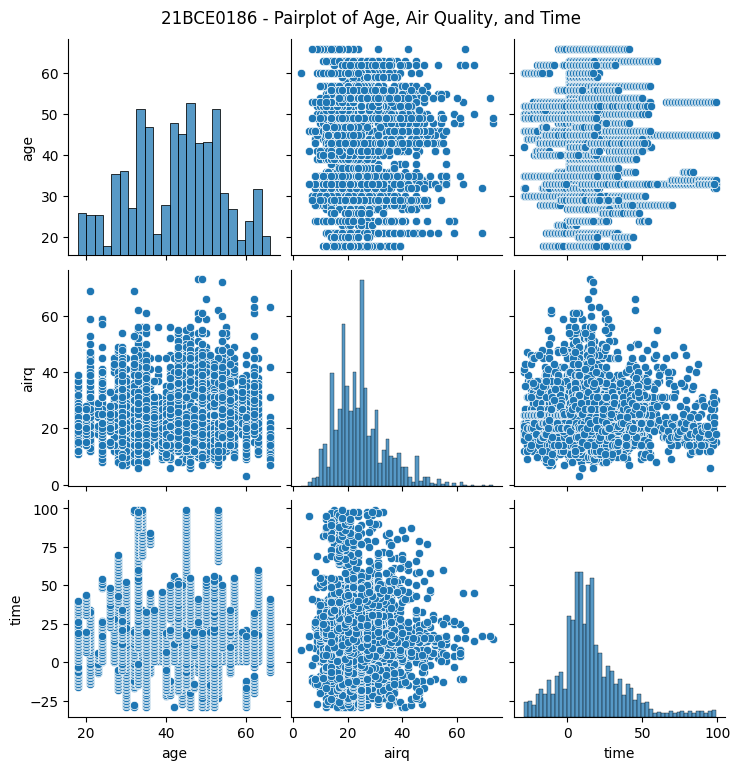

In [11]:
import seaborn as sns

# Matrix scatter plot / Pairplot for selected numeric columns
sns.pairplot(data[['age', 'airq', 'time']])
plt.suptitle('21BCE0186 - Pairplot of Age, Air Quality, and Time', y=1.02)
plt.show()


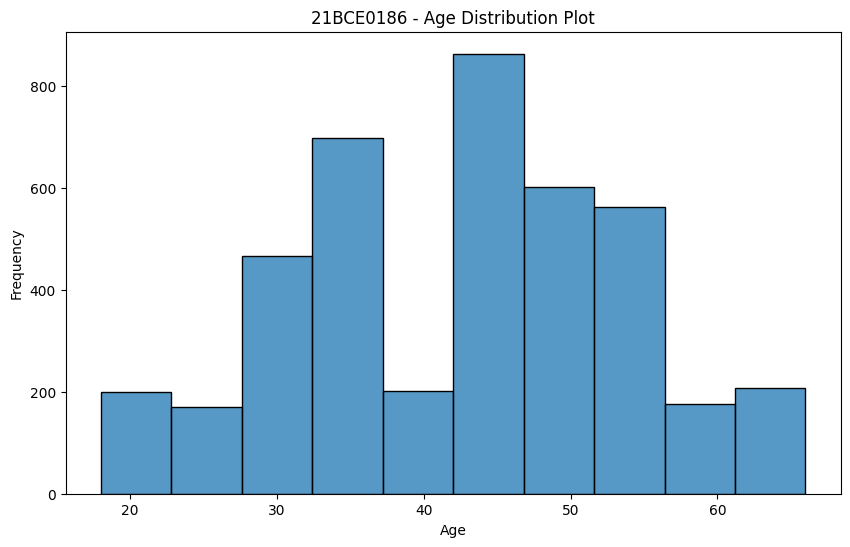

In [12]:
# Distribution plot: histogram for a column you seem fit (e.g., 'age')
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=False, bins=10)
plt.title('21BCE0186 - Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

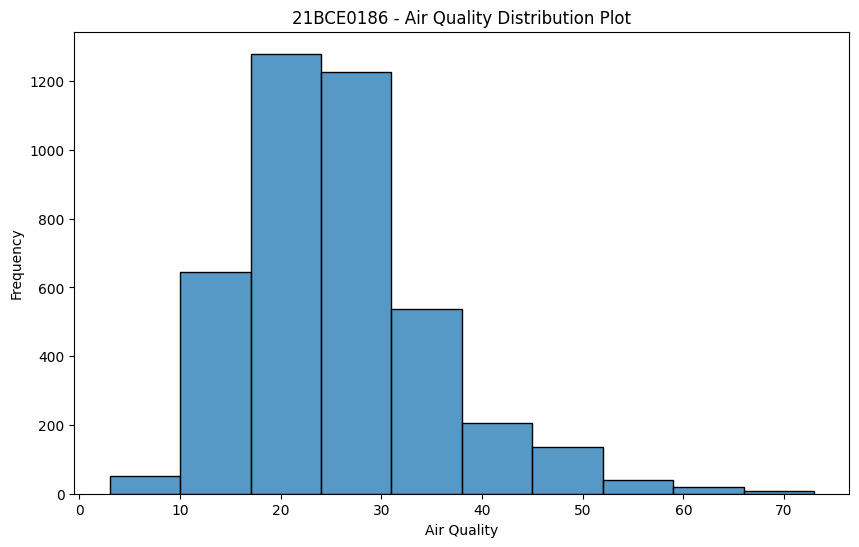

In [13]:
# Distribution plot histogram for 'airq'
plt.figure(figsize=(10, 6))
sns.histplot(data['airq'], kde=False, bins=10)
plt.title('21BCE0186 - Air Quality Distribution Plot')
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.show()

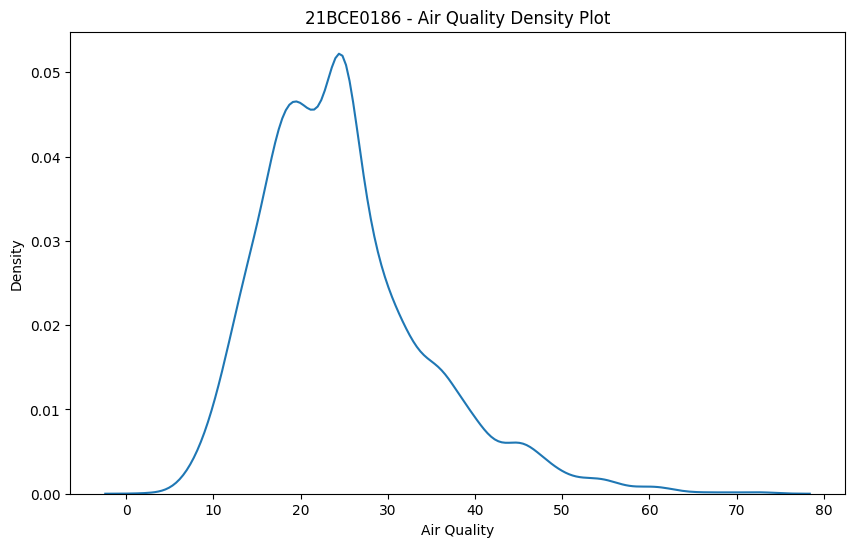

In [14]:
# Distribution plot density for 'airq'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['airq'])
plt.title('21BCE0186 - Air Quality Density Plot')
plt.xlabel('Air Quality')
plt.ylabel('Density')
plt.show()

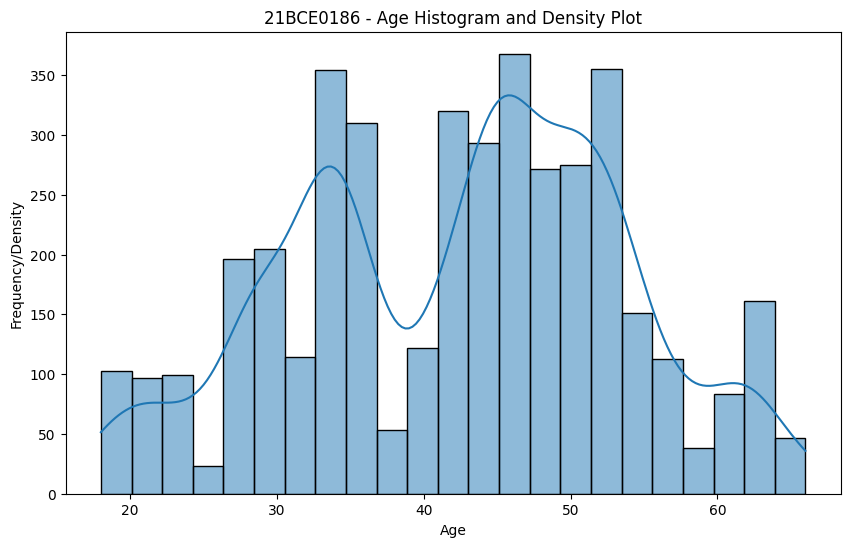

In [15]:
# Distribution plot hist and density for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('21BCE0186 - Age Histogram and Density Plot')
plt.xlabel('Age')
plt.ylabel('Frequency/Density')
plt.show()


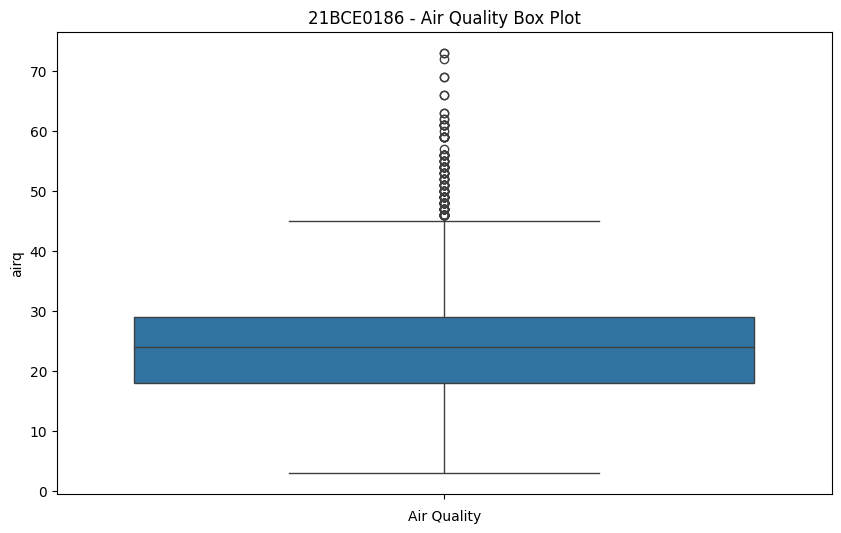

In [16]:
# Box plot for column 'airq'
plt.figure(figsize=(10, 6))
sns.boxplot(data['airq'])
plt.title('21BCE0186 - Air Quality Box Plot')
plt.xlabel('Air Quality')
plt.show()


<Figure size 1000x600 with 0 Axes>

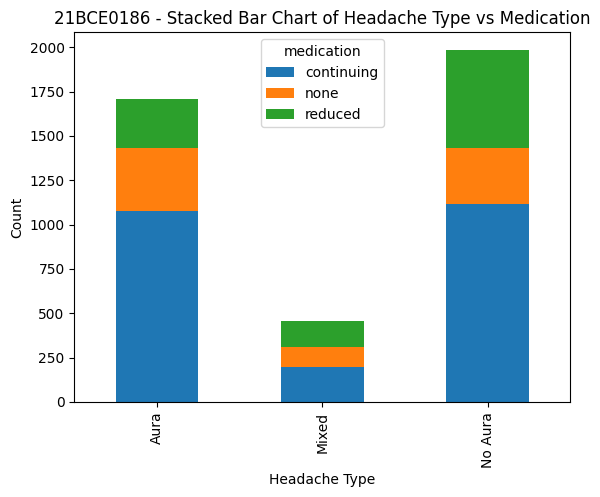

In [17]:
# Stacked bar chart
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(data['hatype'], data['medication'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.title('21BCE0186 - Stacked Bar Chart of Headache Type vs Medication')
plt.show()


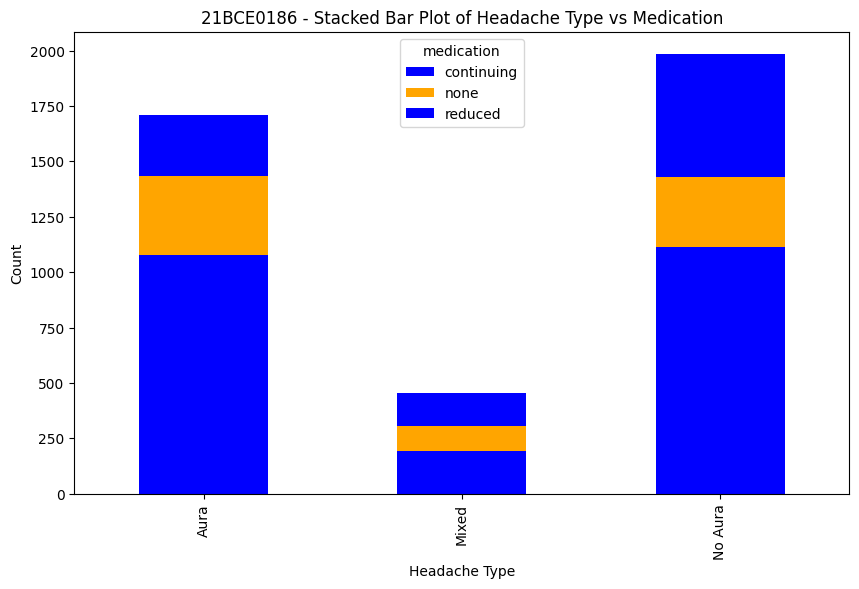

In [18]:
# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10,6))
plt.title('21BCE0186 - Stacked Bar Plot of Headache Type vs Medication')
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.show()


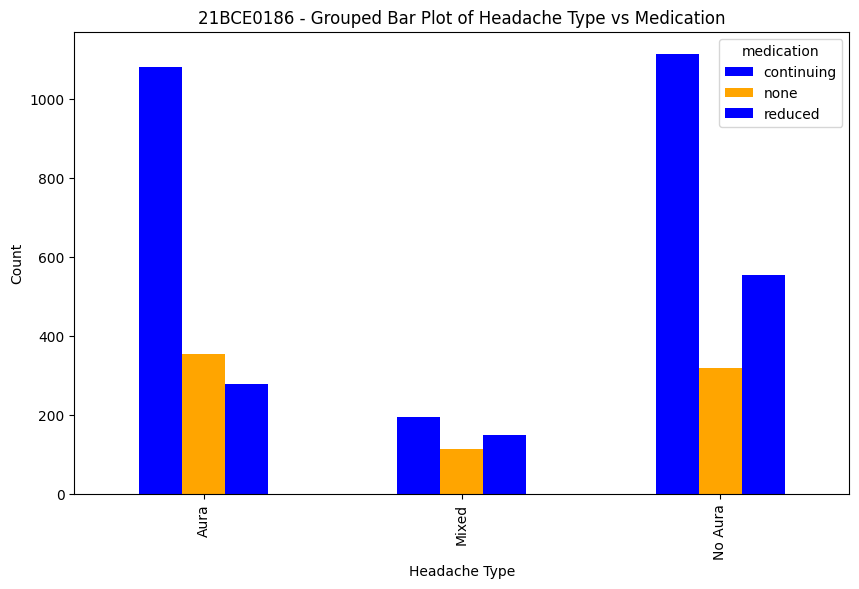

In [19]:
# Grouped Bar Plot (side-by-side)
cross_tab.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(10,6))
plt.title('21BCE0186 - Grouped Bar Plot of Headache Type vs Medication')
plt.xlabel('Headache Type')
plt.ylabel('Count')
plt.show()


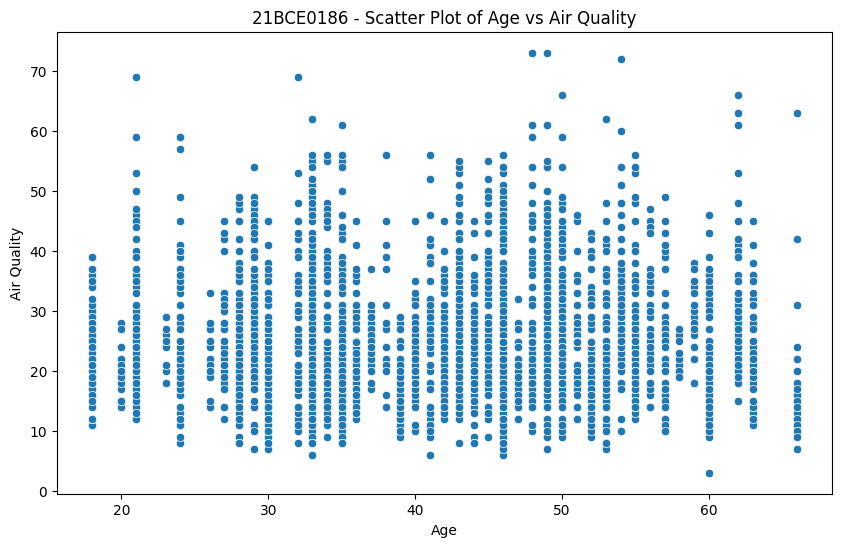

In [20]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='airq', data=data)
plt.title('21BCE0186 - Scatter Plot of Age vs Air Quality')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.show()


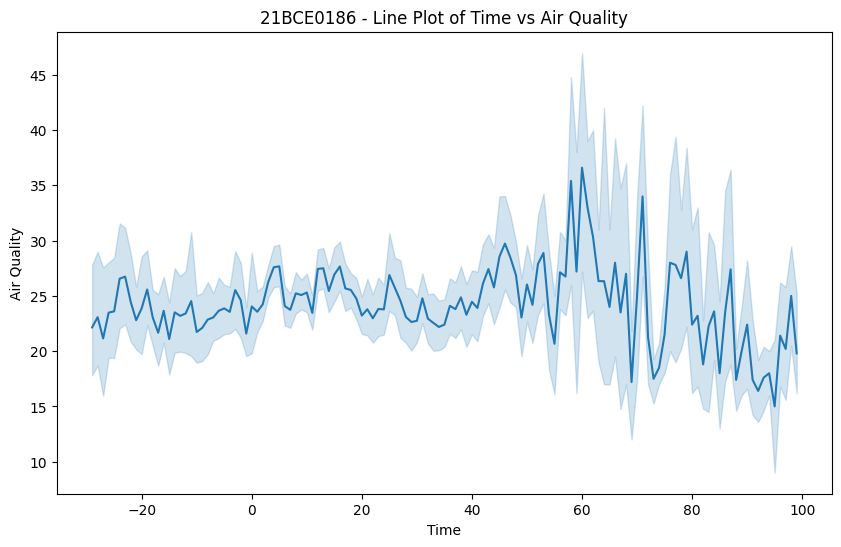

In [21]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='airq', data=data)
plt.title('21BCE0186 - Line Plot of Time vs Air Quality')
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.show()


In [22]:

# Calculate the correlation between the numeric columns using only numeric columns

numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

print("Correlation matrix (numeric columns only):")
print(correlation_matrix)


Correlation matrix (numeric columns only):
          rownames        id      time       dos       age      airq  headache
rownames  1.000000  0.999403 -0.131084  0.971490  0.054772 -0.103562 -0.019665
id        0.999403  1.000000 -0.137080  0.971239  0.057145 -0.102202 -0.019063
time     -0.131084 -0.137080  1.000000 -0.085977 -0.055781 -0.002529 -0.038022
dos       0.971490  0.971239 -0.085977  1.000000  0.021148 -0.129934 -0.005127
age       0.054772  0.057145 -0.055781  0.021148  1.000000 -0.009163 -0.058954
airq     -0.103562 -0.102202 -0.002529 -0.129934 -0.009163  1.000000  0.014357
headache -0.019665 -0.019063 -0.038022 -0.005127 -0.058954  0.014357  1.000000


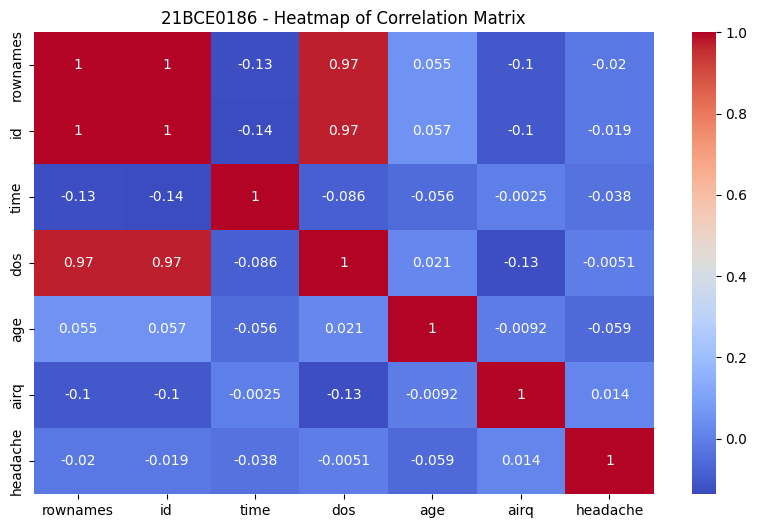

In [23]:
# Heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('21BCE0186 - Heatmap of Correlation Matrix')
plt.show()


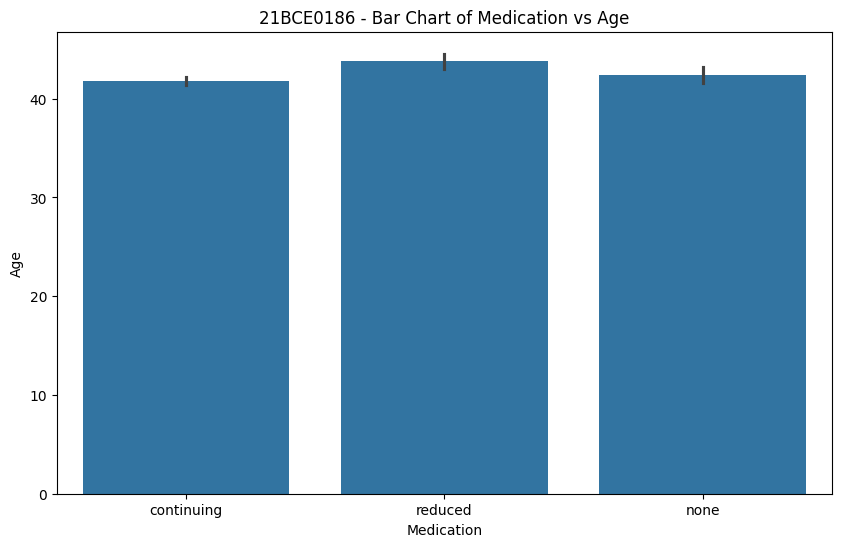

In [24]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='medication', y='age', data=data)
plt.title('21BCE0186 - Bar Chart of Medication vs Age')
plt.xlabel('Medication')
plt.ylabel('Age')
plt.show()


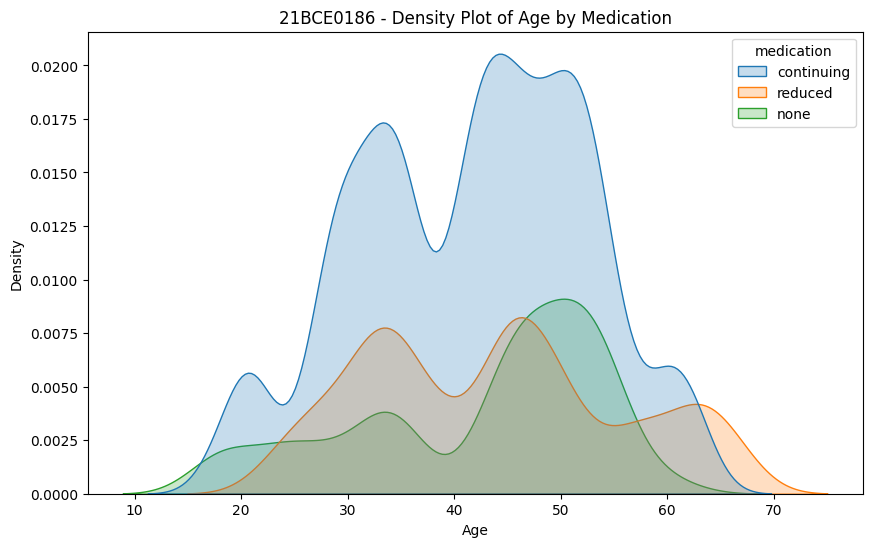

In [25]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='age', hue='medication', fill=True)
plt.title('21BCE0186 - Density Plot of Age by Medication')
plt.xlabel('Age')
plt.show()


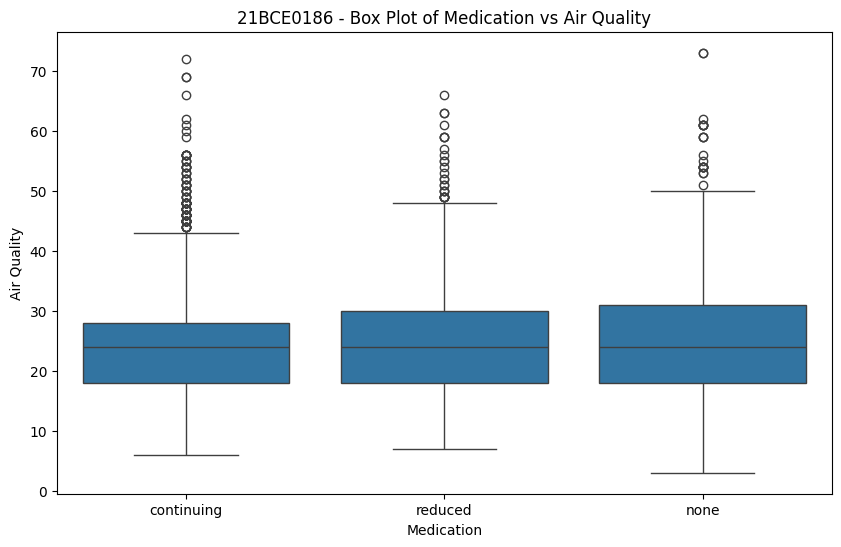

In [26]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Box Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


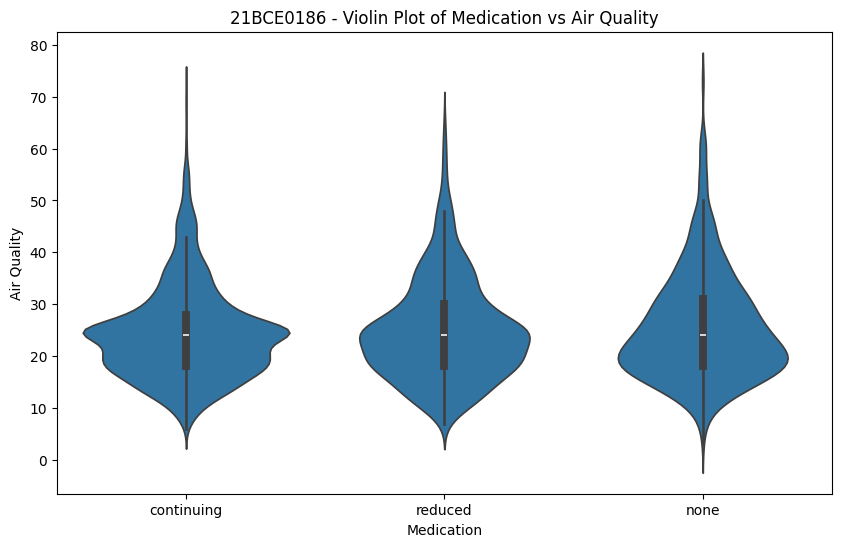

In [27]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Violin Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


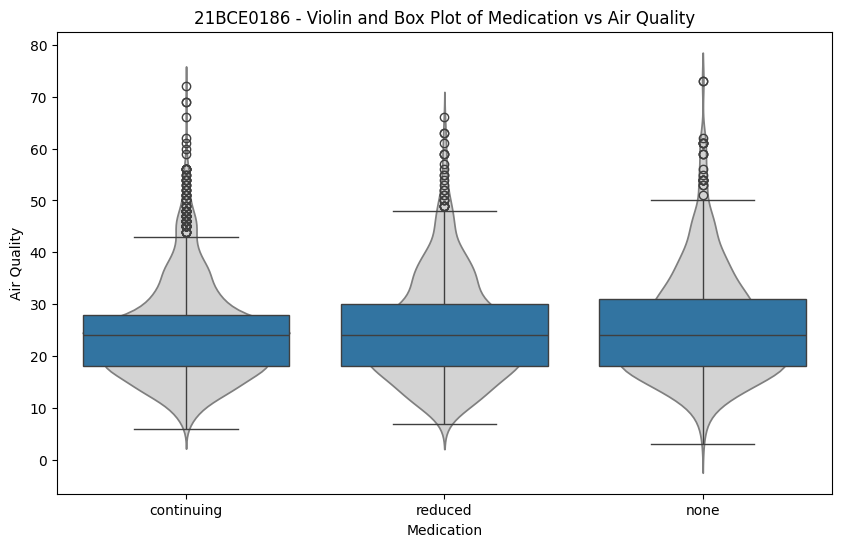

In [28]:
# Violin and Boxplot Overlay
plt.figure(figsize=(10, 6))
sns.violinplot(x='medication', y='airq', data=data, inner=None, color='lightgrey')
sns.boxplot(x='medication', y='airq', data=data)
plt.title('21BCE0186 - Violin and Box Plot of Medication vs Air Quality')
plt.xlabel('Medication')
plt.ylabel('Air Quality')
plt.show()


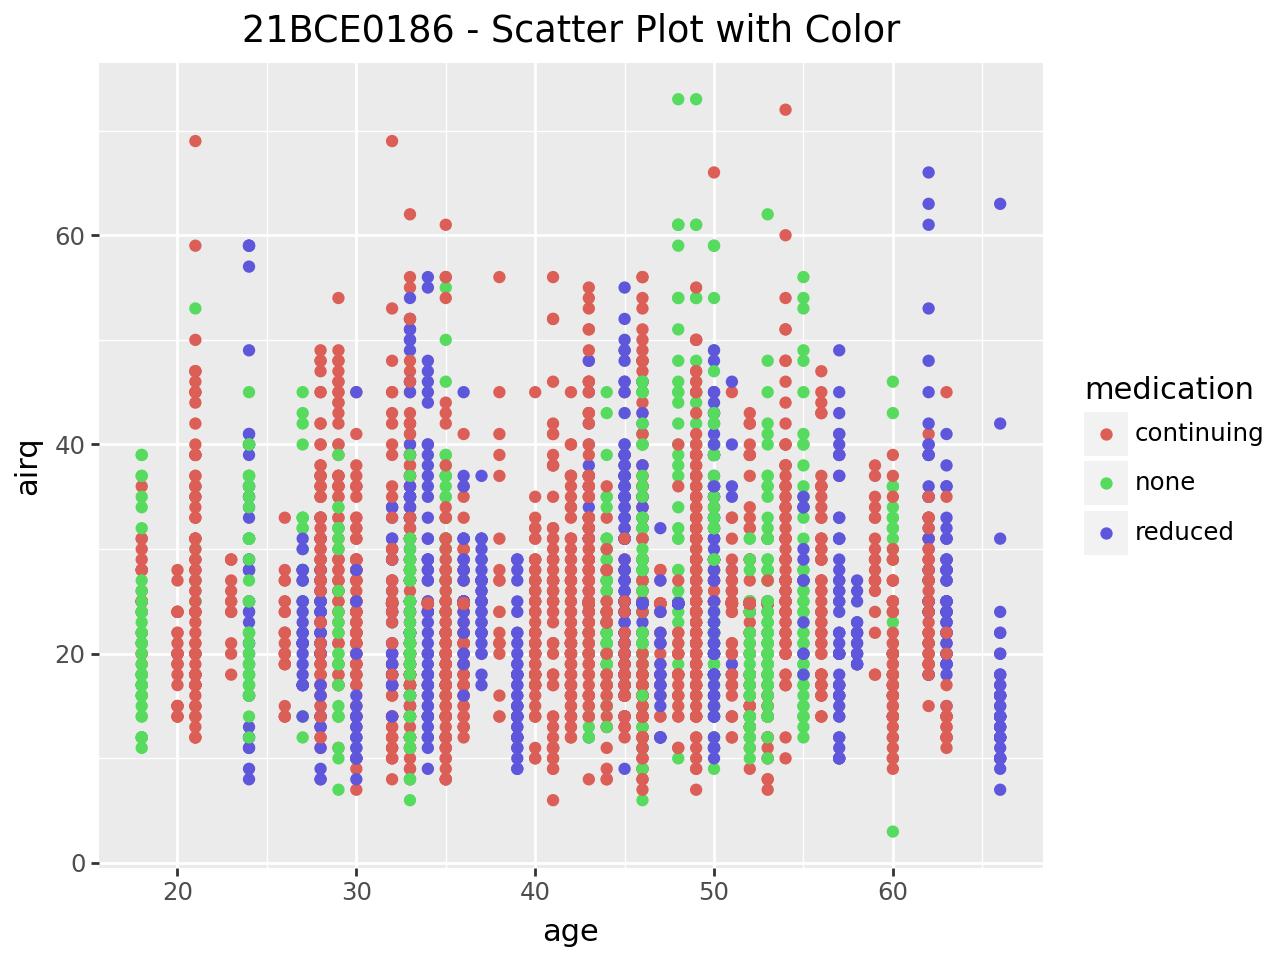

In [29]:
# Scatter plot with color as third variable
(ggplot(data, aes(x='age', y='airq', color='medication'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color'))


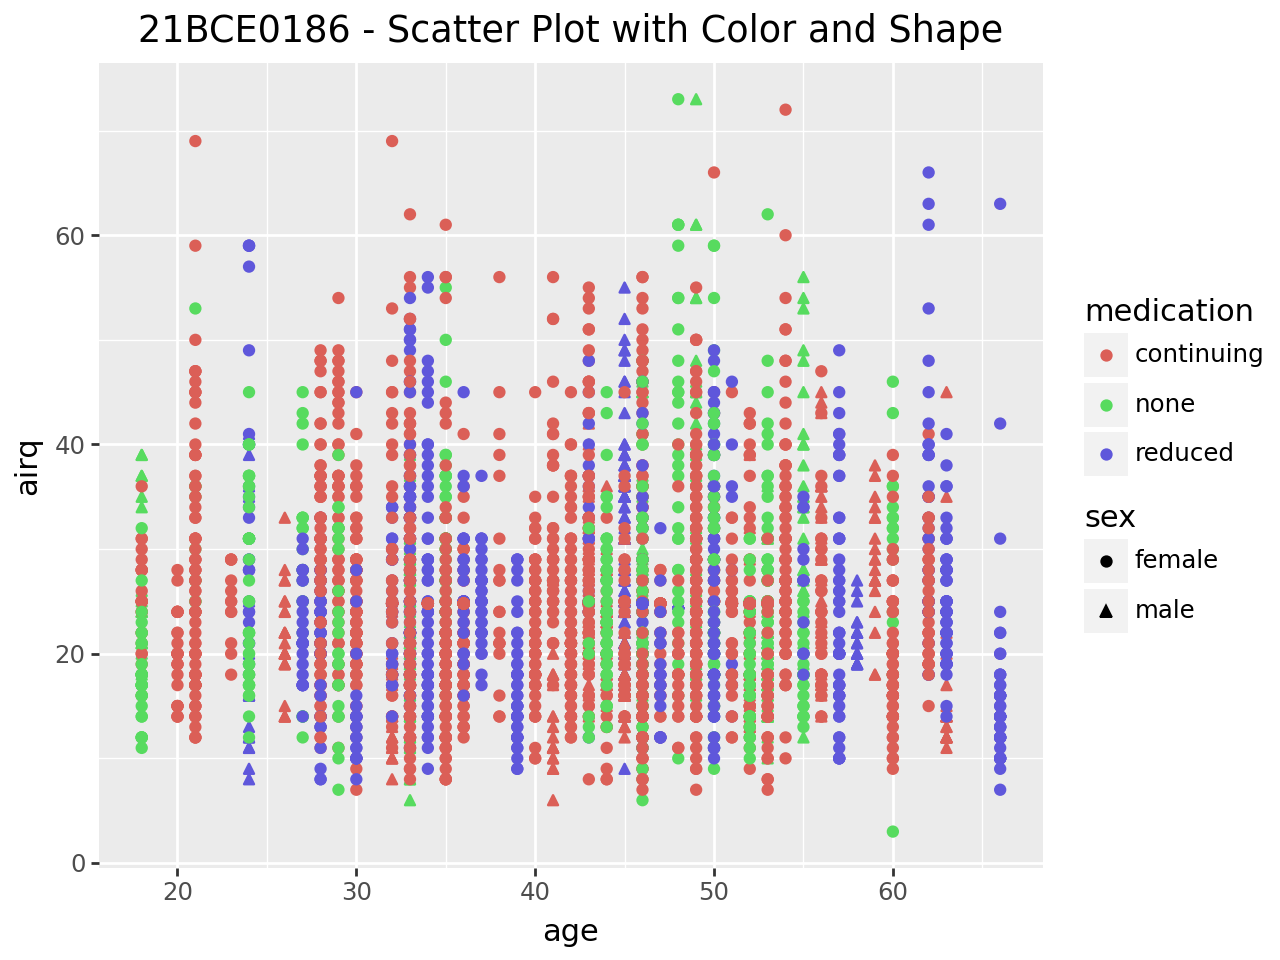

In [30]:
# Scatter plot with color and shape
(ggplot(data, aes(x='age', y='airq', color='medication', shape='sex'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color and Shape'))


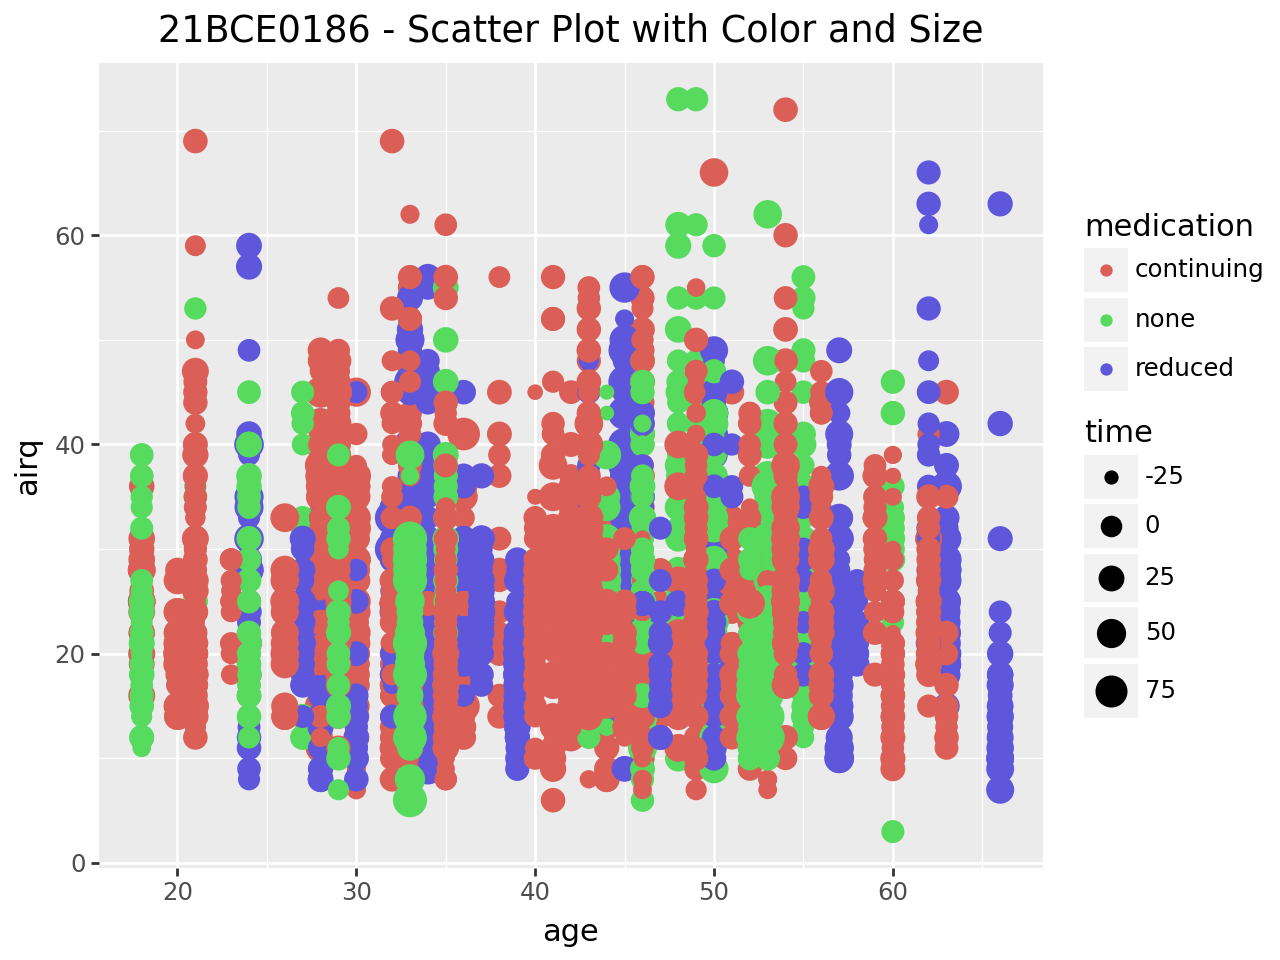

In [31]:
# Scatter plot with color and size
(ggplot(data, aes(x='age', y='airq', color='medication', size='time'))
 + geom_point()
 + ggtitle('21BCE0186 - Scatter Plot with Color and Size'))


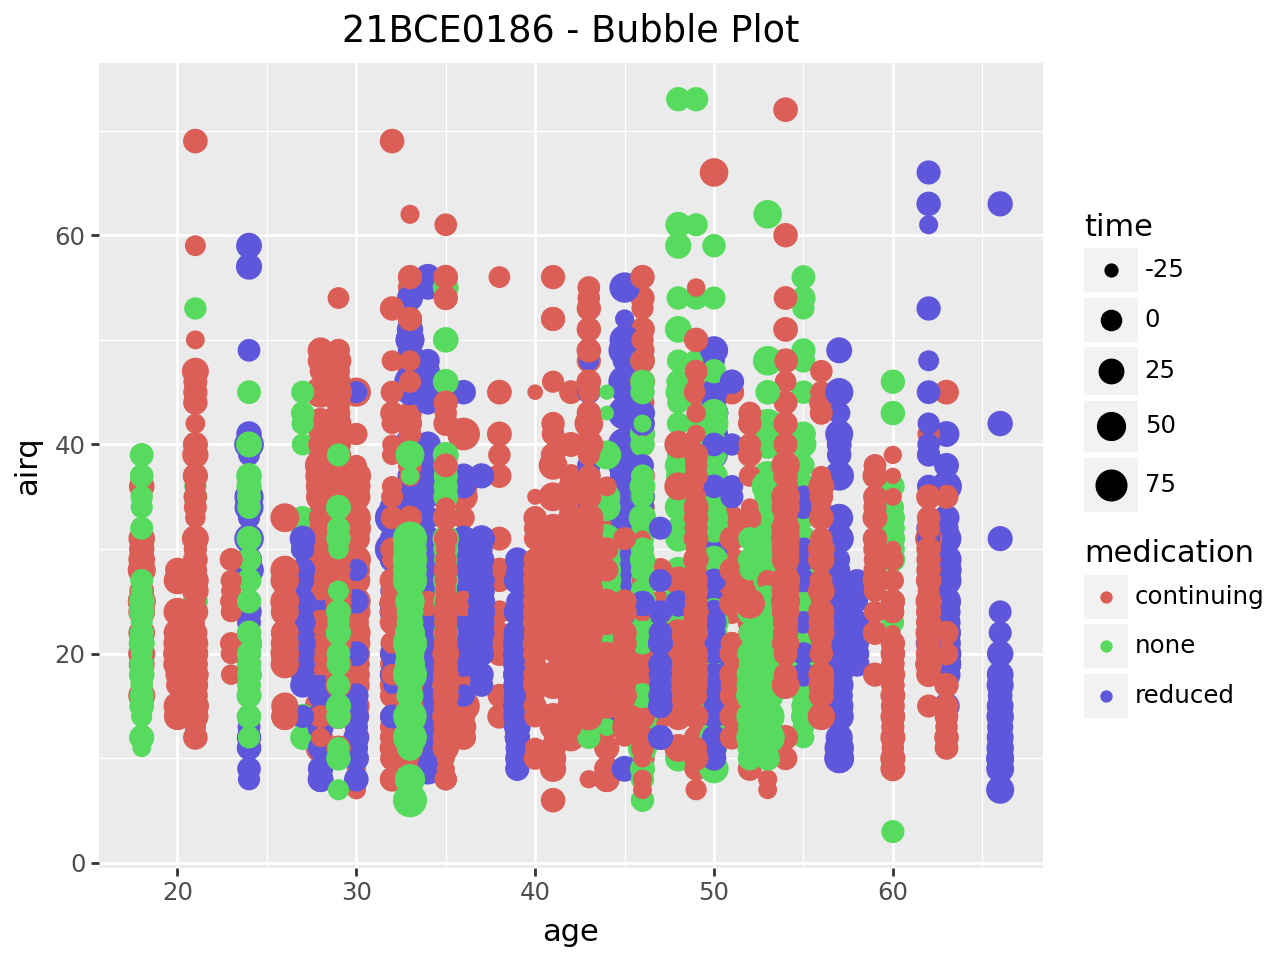

In [32]:
# Bubble plot with size, color
(ggplot(data, aes(x='age', y='airq', color='medication'))
 + geom_point(aes(size='time'))
 + ggtitle('21BCE0186 - Bubble Plot'))


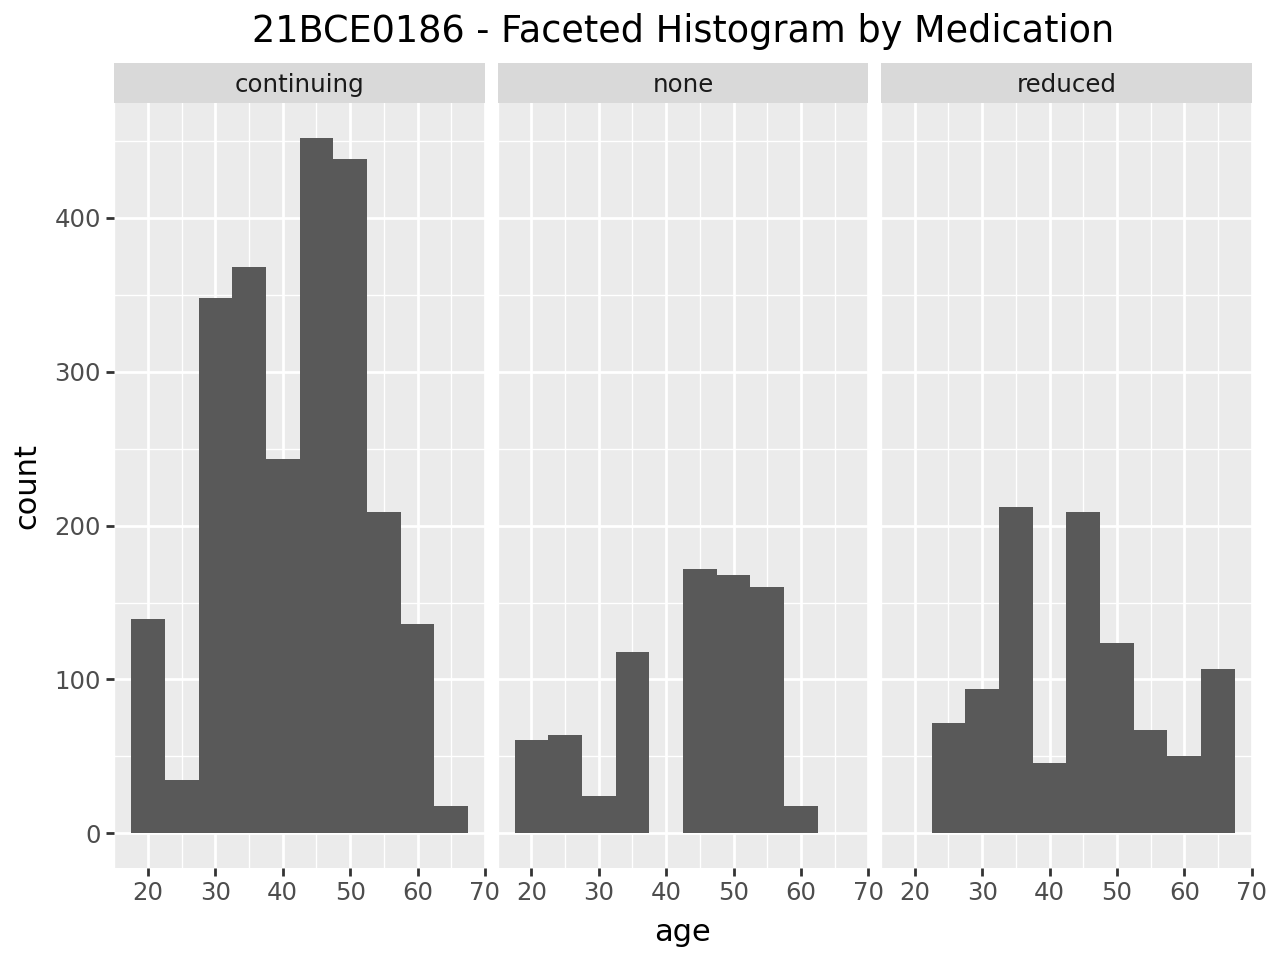

In [33]:
# Histogram with facet wrap
(ggplot(data, aes(x='age'))
 + geom_histogram(binwidth=5)
 + facet_wrap('~medication')
 + ggtitle('21BCE0186 - Faceted Histogram by Medication'))
